# Data preparation

Data preparation is one of the main steps in the data analysis workflow, this task generally has three stages:

* Data cleaning
* **Data scaling**
* Feature transformation

This notebook shows the main techniques for performing data scaling.

In [1]:
import os
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

**Load data**

In this case we use a time series data set with 89 features used to train a classification machine learning model to predict a trading position on S&P 500 futures.

In [2]:
data_path = ['dataset']

In [3]:
# Import the data using the file path
filepath = os.sep.join(data_path + ['sab1_unscaled_2012_mar22.csv'])
data = pd.read_csv(filepath, sep=',')
data.head()

,Date,SPX_Close_1PR,SPX_Close_5PR,SPX_Close_10PR,SPX_Close_15PR,SPX_Close_20PR,SPX_Close_25PR,SPX_Close_SMA12_1PR,SPX_Close_SMA12_5PR,SPX_Close_SMA12_10PR,...,VVIX_Close_HV20,VVIX_Range_1P,VVIX_Range_5P,VVIX_Range_10P,VVIX_Range_20P,VVIX_VIX_Ratio,VVIX_VIX_HV10,VVIX_VIX_HV20,SPX_VIX_1PR_Correl_20P,Target_SAB1
0,03/29/12 09:30 AM,-0.0067,-0.0032,-0.0073,-0.0133,-0.0150,-0.0149,-0.0008,-0.0036,-0.0084,...,0.8155,0.0111,0.0488,0.0548,0.0960,6.28,0.47,0.66,-0.9605,-1.0
1,03/29/12 10:00 AM,-0.0018,-0.0037,-0.0052,-0.0136,-0.0160,-0.0157,-0.0008,-0.0033,-0.0082,...,0.8134,0.0071,0.0474,0.0489,0.0961,6.24,0.51,0.66,-0.9525,1.0
2,03/29/12 10:30 AM,0.0012,-0.0051,-0.0049,-0.0111,-0.0154,-0.0149,-0.0007,-0.0032,-0.0080,...,0.8095,0.0127,0.0430,0.0491,0.0965,6.25,0.52,0.66,-0.9526,1.0
3,03/29/12 11:00 AM,-0.0015,-0.0068,-0.0057,-0.0121,-0.0175,-0.0170,-0.0005,-0.0031,-0.0075,...,0.8010,0.0065,0.0431,0.0491,0.0966,6.24,0.52,0.66,-0.9455,1.0
4,03/29/12 11:30 AM,-0.0004,-0.0091,-0.0055,-0.0105,-0.0175,-0.0174,-0.0006,-0.0033,-0.0071,...,0.7990,0.0065,0.0174,0.0488,0.0959,6.22,0.52,0.67,-0.9420,1.0


**Lets plot a histogram of four features of the data set**

C:\Users\Jose\AppData\Local\Temp/ipykernel_58308/2735264028.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  data.iloc[:,71:75].hist(ax=ax1, bins=50, color = "skyblue", density=True)


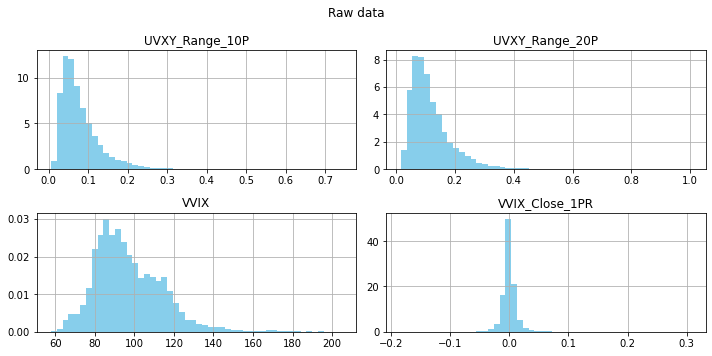

In [4]:
fig = plt.figure(figsize = (10,5))
ax1 = fig.gca()
data.iloc[:,71:75].hist(ax=ax1, bins=50, color = "skyblue", density=True)
plt.suptitle('Raw data')
plt.tight_layout()

**Data scaling**

To perform data scaling of the 89 features in the dataset, we use the python sklearn library, using the following techniques:

* MinMaxScaler
* StandardScaler
* RobustScaler

**MinMaxScaler**

For each value in a feature, MinMaxScaler subtracts the minimum value in the feature and then divides by the range. The range is the difference between the original maximum and original minimum.

C:\Users\Jose\AppData\Local\Temp/ipykernel_58308/226669256.py:8: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  data_m.iloc[:,71:75].hist(ax=ax1, bins=50, color = "skyblue", density=True)


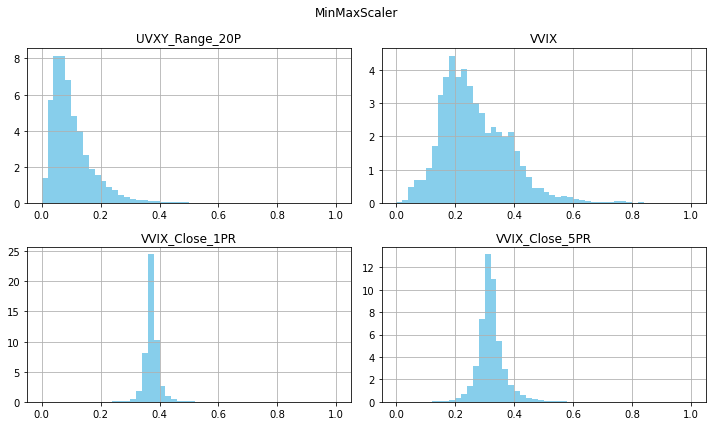

In [5]:
from sklearn.preprocessing import MinMaxScaler
transformer_m = MinMaxScaler().fit(data.iloc[:,1:90])
data_m= transformer_m.transform(data.iloc[:,1:90])
data_m= pd.DataFrame(data_m,columns=data.iloc[1:1,1:90].columns)

fig = plt.figure(figsize = (10,6))
ax1 = fig.gca()
data_m.iloc[:,71:75].hist(ax=ax1, bins=50, color = "skyblue", density=True)
plt.suptitle('MinMaxScaler')
plt.tight_layout()

**StandardScaler**

StandardScaler standardizes a feature by subtracting the mean and then scaling to unit variance. Unit variance means dividing all the values by the standard deviation. StandardScaler does not meet the strict definition of scale I introduced earlier.

StandardScaler results in a distribution with a standard deviation equal to 1. The variance is equal to 1 also, because variance = standard deviation squared. And 1 squared = 1.

StandardScaler makes the mean of the distribution approximately 0.


C:\Users\Jose\AppData\Local\Temp/ipykernel_58308/1674937153.py:8: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  data_s.iloc[:,71:75].hist(ax=ax2, bins=50, color = "skyblue", density=True)


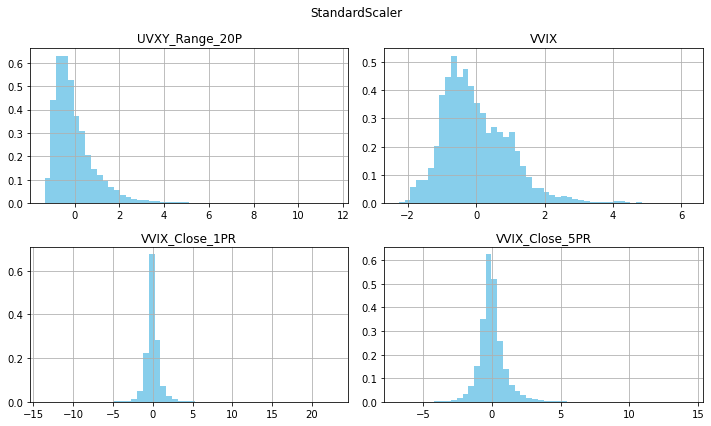

In [6]:
from sklearn.preprocessing import StandardScaler
transformer_s = StandardScaler().fit(data.iloc[:,1:90])
data_s= transformer_s.transform(data.iloc[:,1:90])
data_s= pd.DataFrame(data_s,columns=data.iloc[1:1,1:90].columns)

fig = plt.figure(figsize = (10,6))
ax2 = fig.gca()
data_s.iloc[:,71:75].hist(ax=ax2, bins=50, color = "skyblue", density=True)
plt.suptitle('StandardScaler')
plt.tight_layout()

**RobustScaler**

RobustScaler transforms the feature vector by subtracting the median and then dividing by the interquartile range (75% value — 25% value).

Use RobustScaler if you want to reduce the effects of outliers, relative to MinMaxScaler.

C:\Users\Jose\AppData\Local\Temp/ipykernel_58308/4143129594.py:8: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  data_r.iloc[:,71:75].hist(ax=ax3, bins=50, color = "skyblue", density=True)


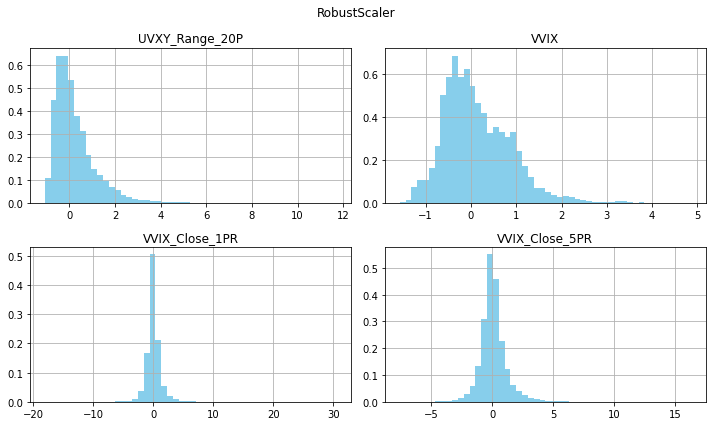

In [7]:
from sklearn.preprocessing import RobustScaler
transformer_r = RobustScaler().fit(data.iloc[:,1:90])
data_r= transformer_r.transform(data.iloc[:,1:90])
data_r= pd.DataFrame(data_r,columns=data.iloc[1:1,1:90].columns)

fig = plt.figure(figsize = (10,6))
ax3 = fig.gca()
data_r.iloc[:,71:75].hist(ax=ax3, bins=50, color = "skyblue", density=True)
plt.suptitle('RobustScaler')
plt.tight_layout()

**Data scaling comparison**

Below is a comparison of the raw data histogram and the different data scaling methods. In general, we can see that the scaling of StandardScaler and RobustScaler groups the data close to the zero value.

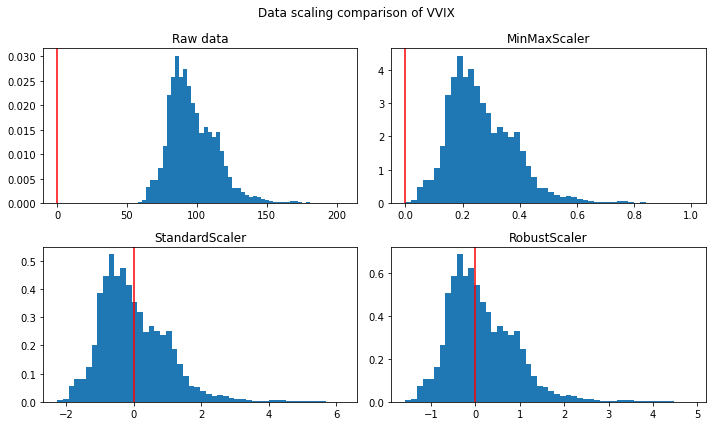

In [8]:
var='VVIX'
bins=50
plt.figure(figsize = (10,6))

#the figure has 1 row, 2 columns, and this plot is the first plot.
#plot 1:
plt.subplot(2, 2, 1)
plt.hist(data[var],bins=bins, density=True)
plt.axvline(x=0, color='r')
plt.title('Raw data')

#plot 2:
plt.subplot(2, 2, 2)
plt.hist(data_m[var], bins=bins, density=True)
plt.axvline(x=0, color='r')
plt.title('MinMaxScaler')

#plot 3:
plt.subplot(2, 2, 3)
plt.hist(data_s[var], bins=bins, density=True)
plt.axvline(x=0, color='r')
plt.title('StandardScaler')

#plot 4:
plt.subplot(2, 2, 4)
plt.hist(data_r[var], bins=bins, density=True)
plt.axvline(x=0, color='r')
plt.title('RobustScaler')

plt.suptitle('Data scaling comparison of {}'.format(var))
plt.tight_layout()

In [9]:
#p <= alpha: reject H0, not normal.
#p > alpha: fail to reject H0, normal.

import numpy as np
from scipy import stats
k2, p = stats.normaltest(data_r[var])
alpha = 0.05
print("p = {:g}".format(p))
if p < alpha:  # null hypothesis: x comes from a normal distribution
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")

p = 0
The null hypothesis can be rejected


**Sources**

[Scale, Standardize, or Normalize with Scikit-Learn](https://towardsdatascience.com/scale-standardize-or-normalize-with-scikit-learn-6ccc7d176a02#:~:text=RobustScaler%20transforms%20the%20feature%20vector,scale%20to%20the%20other%20features.)